**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial

In [ ]:
data = pd.read_csv('drive/My Drive/app/games.csv')

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привел название столбцов к нижнему регистру

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
data.dropna(subset = ['name'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
def null_counts_percent(column):
    
    #Функция вывода количества и процента от общего числа NAN значений столбца
    
    print('nulls count:', column.isna().sum())
    print('nulls percent:', column.isna().sum() / len(column) * 100)

In [ ]:
null_counts_percent(data['year_of_release'])

nulls count: 269
nulls percent: 1.6095255190570215


Количество игр, для которых не указан год выпуска, незначительно, поэтому они могут быть удалены из набора данных

In [ ]:
data.dropna(subset = ['year_of_release'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [ ]:
null_counts_percent(data['critic_score'])

nulls count: 8461
nulls percent: 51.453417659936754


Огрмное количество пропусков, удалять нельзя

In [ ]:
np.sort(data['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [ ]:
data['critic_score'].fillna(0, inplace=True)
data['critic_score'] = data['critic_score'].astype(int)
data.loc[data['critic_score'] == 0, 'critic_score'] = np.nan
np.sort(data['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [ ]:
null_counts_percent(data['user_score'])

nulls count: 6605
nulls percent: 40.166626125030405


In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значения столбца необходимо преобразовать из str во float. При этом значение tbd (To Be Determined) будем считать отсутствием рейтинга и заменим tbd на NaN.

In [ ]:
data['user_score'].fillna('-1', inplace=True)
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1'
data['user_score'] = pd.to_numeric(data['user_score'])
data.loc[data['user_score'] == -1, 'user_score'] = np.nan
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
null_counts_percent(data['rating'])

nulls count: 6676
nulls percent: 40.59839455120409


In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(int)

## Удаление дубликатов

In [ ]:
data.duplicated().sum()

0

***Вывод***  
  
На этапе предобработки данных в таблице **games**:
- имена столбцов приведены к нижнему регистру;
- удалены строки с пропусками в названиях игр и годов выпуска;
- в столбце ***critic_score*** пропуски заменены на значение -1, тип данных столбца преобразован в *int*;
- в столбце ***user_score*** пропуски и значения *tbd* заменены на значение -1, тип данных столбца преобразован во *float*;
- в столбце ***rating*** пропуски заменены на значение -1;
- тип данных столбца ***year_of_release*** преобразован в *int*.  
  
Дубликаты строк в таблице **games** отсутствуют.

## Дополнение данных

In [ ]:
data['total_sales'] = (data['na_sales'] +
                        data['eu_sales'] +
                        data['jp_sales'] +
                        data['other_sales'])

## 2.3 Анализ данных

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


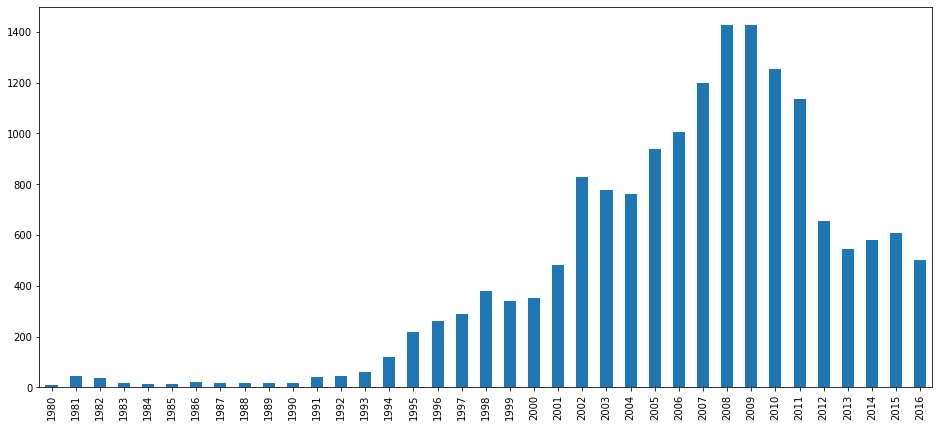

In [ ]:
data['year_of_release'].value_counts().sort_index().plot(kind="bar", figsize=(16,7))

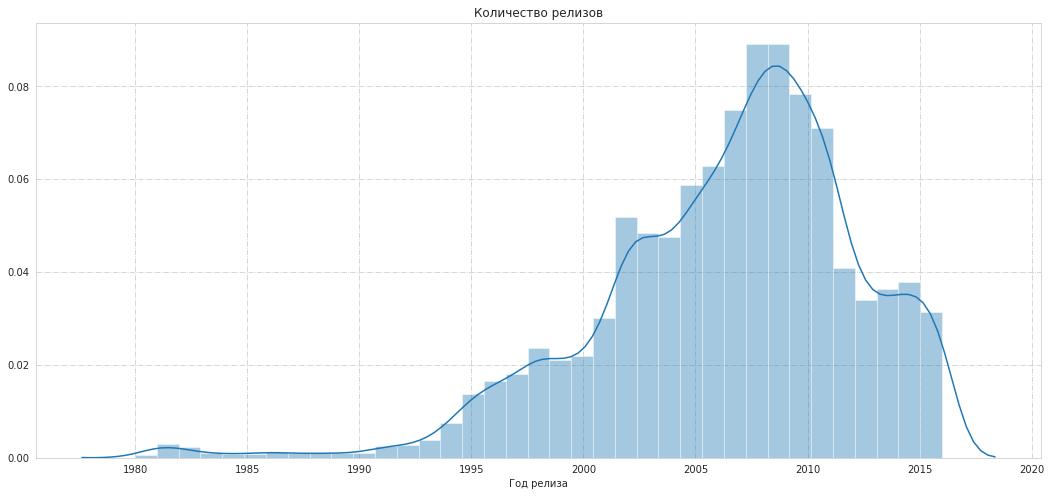

In [ ]:
with sns.axes_style('whitegrid', {'grid.linestyle':'-.'}):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.distplot(data['year_of_release'], bins=37, ax=ax);
    ax.set_title('Количество релизов')
    plt.xlabel('Год релиза')
print()

In [ ]:
def distplot(data, plot_title='', x_title='', bins=10, figsize=(13, 5)):
    '''
    Функция отрисовки гистограммы с линией распределения плотности вероятности
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title(plot_title)
        sns.distplot(data, ax=ax, bins=bins, axlabel=x_title)
    print()


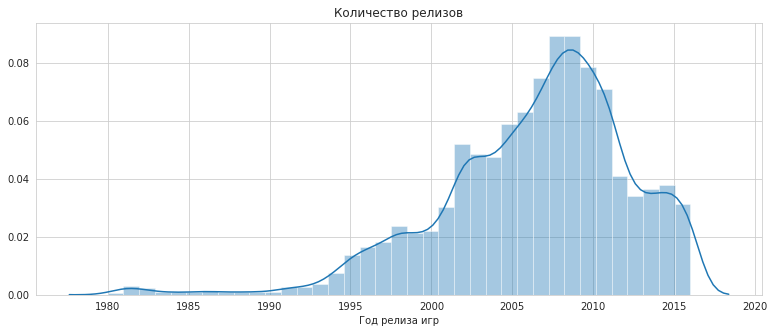

In [ ]:
distplot(data['year_of_release'],
         plot_title='Количество релизов',
         x_title='Год релиза игр',
         bins=37)

In [ ]:
sns.set_style('darkgrid', {'grid.linestyle':'--'})

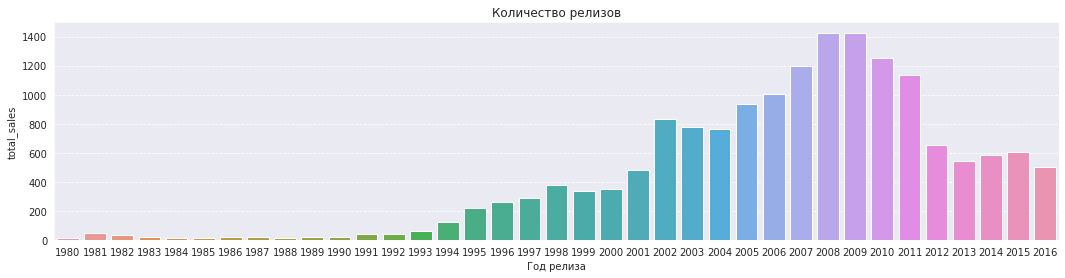

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
sns.barplot(x='year_of_release', y='total_sales',data=data, ax=ax, estimator=len)
ax.set_title('Количество релизов')
plt.xlabel('Год релиза')
print()

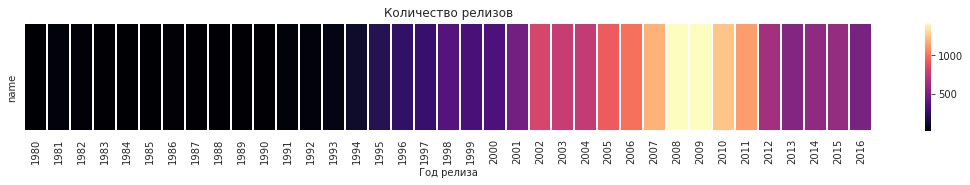

In [ ]:
fig, ax = plt.subplots(figsize=(19,2))
sns.heatmap(data.pivot_table(values='name', columns='year_of_release', aggfunc='count'),cmap='magma',linecolor='white', linewidths=1, ax=ax)
plt.xlabel('Год релиза')
ax.set_title('Количество релизов')
print()

Заметный всплеск числа релизов начался приблизительно с 1994 года, интенсивно рос до 2000 года, после чего произошло их резкое ежегодное увеличение. Верояно, особенный интерес для нас будет представлять период с 2000 по 2016 год

По всей видимости, данная гистограмма показывает, что рынок компьютерных игр перерождался -- уходили в прошлое традиционные игровые платформы и на их место приходили полатформы мобильные, смартфонные.

In [ ]:
def barplot(data, x='', y='', plot_title='', x_title='', y_title='', estimator=sum, figsize=(16, 7)):
    '''
    Функция отрисовки столбчатой диаграммы
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.barplot(x=x, y=y,data=data, ax=ax, estimator=estimator)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)
    print()

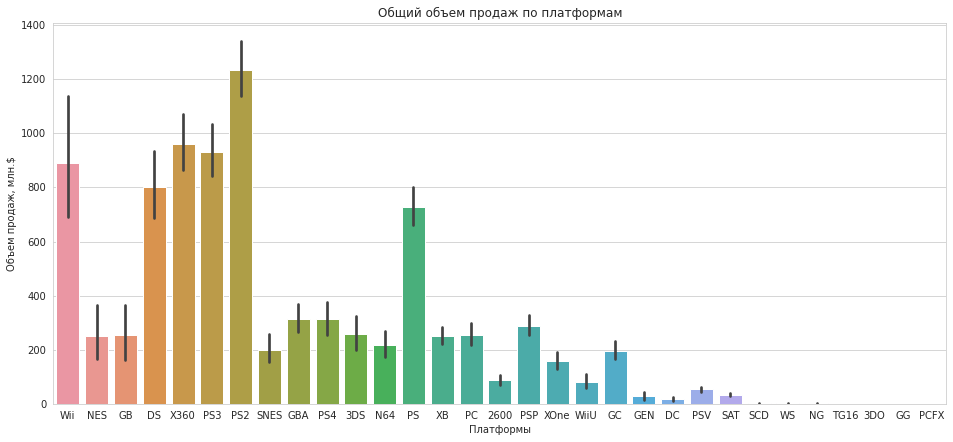

In [ ]:
barplot(data, 
        x='platform', 
        y='total_sales', 
        estimator=sum,
        plot_title='Общий объем продаж по платформам', 
        x_title='Платформы',
        y_title='Объем продаж, млн.$')

Продолжим анализ данных для платформ, суммарный объем продаж для которых был больше 100 млн.$

In [ ]:
platforms_total_sales = data.groupby('platform')['total_sales'].sum() > 100

actual_platforms_list = []

for i in platforms_total_sales.index:
    if platforms_total_sales[i]:
        actual_platforms_list.append(i)

In [ ]:
actual_platforms = data.loc[data['platform'].isin(actual_platforms_list),:]

In [ ]:
(actual_platforms
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values(by='total_sales', ascending = False)
     .swapaxes('index', 'columns'))

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64,SNES,GC,XOne
total_sales,1233.56,961.24,931.34,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32


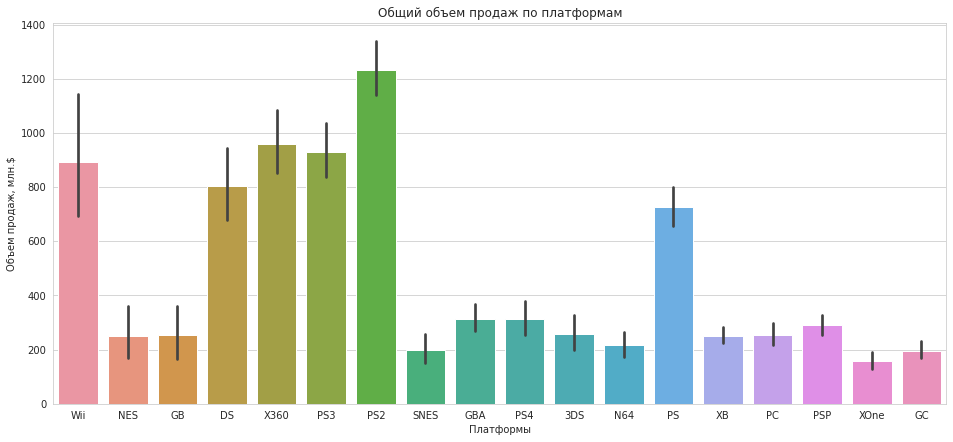

In [ ]:
barplot(actual_platforms, 
        x='platform', 
        y='total_sales', 
        estimator=sum,
        plot_title='Общий объем продаж по платформам', 
        x_title='Платформы',
        y_title='Объем продаж, млн.$')

Далее проанализируем для актуальных платформ изменение объемов продаж по годам

In [ ]:
platforms_year_total_sales = (actual_platforms.pivot_table(index='platform',
                                                           columns='year_of_release',
                                                           values='total_sales',
                                                           aggfunc='sum')
                                              .fillna(0))
platforms_year_total_sales.head(10)

year_of_release,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.34,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.10,39.50,49.24,57.87,33.97,3.25,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.04,0.00,0.00,0.03,0.00,0.00,0.00,3.03,0.00,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
def ineplot_matrix(i, j, data, title='', cells=[], xlabel='', ylabel='', figsize=(0,0)):
    '''
    Функция отрисовки матрицы линйных графиков
    '''
    fig, axs = plt.subplots(i, j, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")

    for row in range(i):
        for col in range(j):
            _cell = cells.pop(0)
            axs[row][col].set_title(title + _cell)
            axs[row][col].set_xlabel(xlabel)
            axs[row][col].set_ylabel(ylabel)
            sns.lineplot(data=data.loc[_cell], ax=axs[row][col])

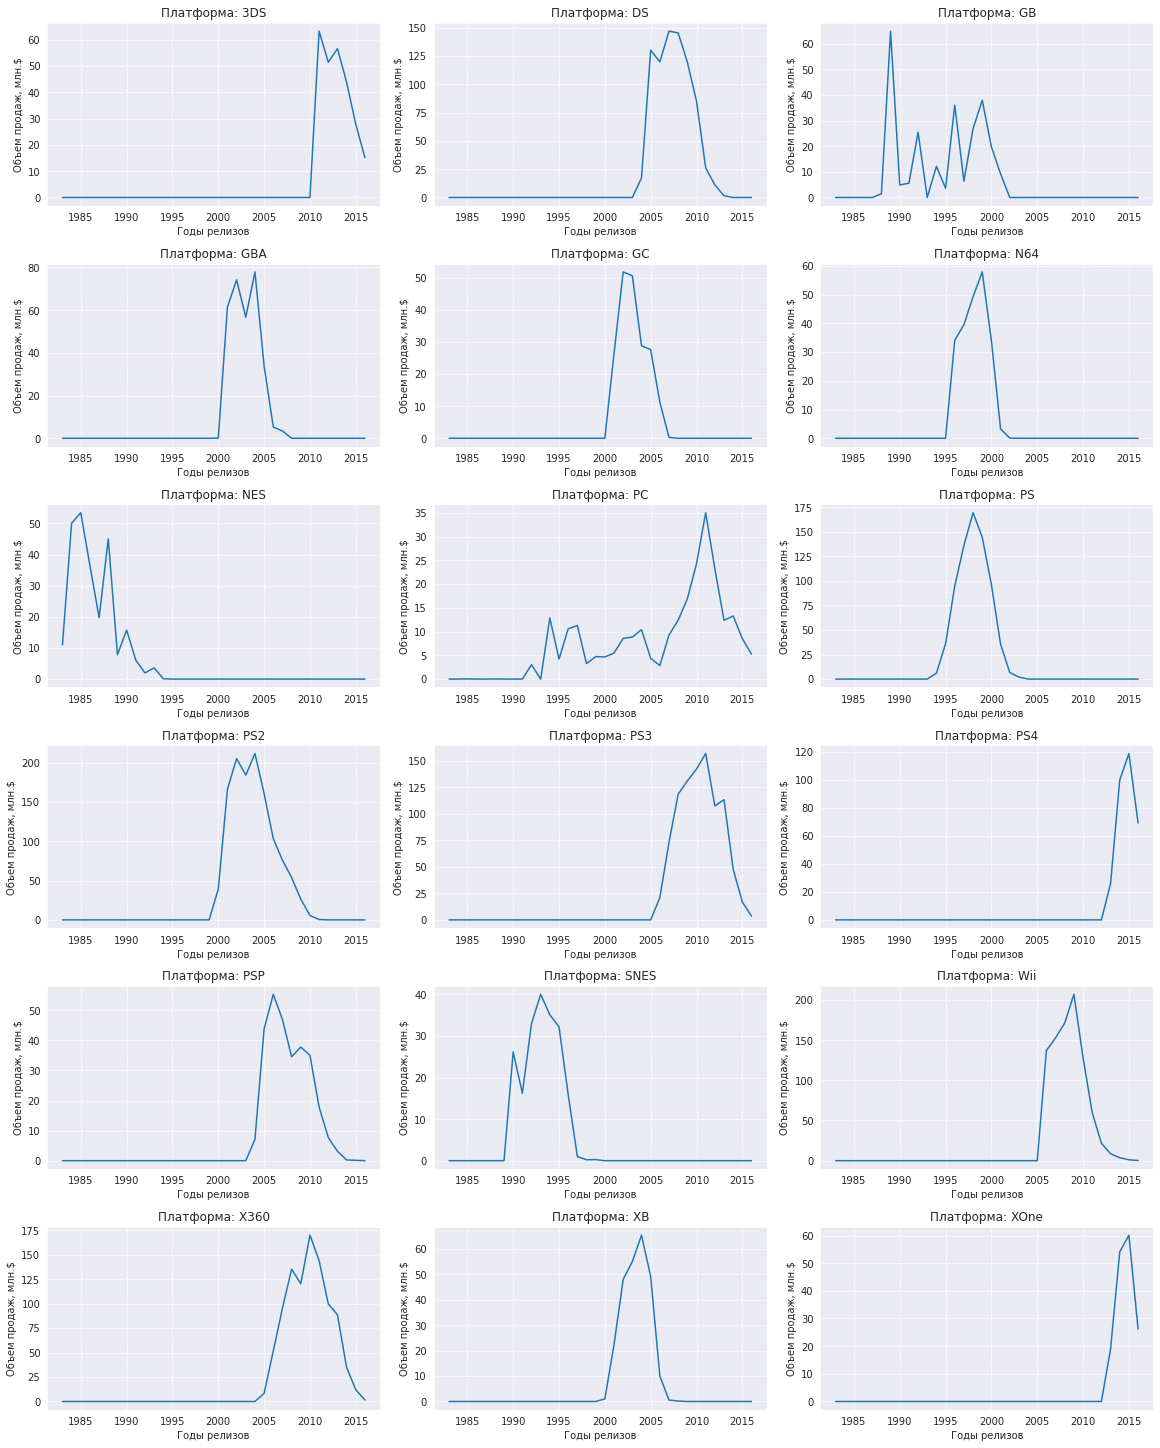

In [ ]:
ineplot_matrix(6, 3, platforms_year_total_sales,
                     title='Платформа: ', 
                     cells=actual_platforms_list.copy(),
                     xlabel='Годы релизов',
                     ylabel='Объем продаж, млн.$',
                     figsize=(16, 20))

Из графиков наглядно видно, что каждая платформа имеет ограниченный срок "жизни" -- каждая из них появляется и, через некоторое время, становится неактуальной. Определим средний срок "жизни" платформы

In [ ]:
counts = []
years = platforms_year_total_sales.columns

for platform in platforms_year_total_sales.index:
    _count = 0
    for year in years:
        if platforms_year_total_sales.loc[platform, year] != 0.0: 
            _count += 1
    counts.append(_count)

np.mean(counts)

10.277777777777779

Средний срок "жизни" платформы равен 10 годам. Таким образом к 2016 году будут "доживать" платформы появившиеся в 2006 году, а наиболее актуальными будут платформы, появившиеся в 2011 году. Поэтому для дальнейшего анализа будем рассматривать период с 2011 по 2016 год

In [ ]:
actual_games = actual_platforms.loc[data['year_of_release'] >= 2011, :]
actual_games.reset_index(drop=True)
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [ ]:
platforms_year_total_sales = (actual_games.pivot_table(index='platform',
                                                       columns='year_of_release',
                                                       values='total_sales',
                                                       aggfunc='sum')
                                          .fillna(0))
platforms_year_total_sales

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,0.00,0.00,0.00
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,0.00,0.00,0.00,0.00,0.00
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,0.00,0.00,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,0.00
Wii,59.65,21.71,8.59,3.75,1.14,0.18
X360,143.84,99.74,88.58,34.74,11.96,1.52


<a id="cell_1"></a>
К 2016 году продаваемыми были игры 6-ти платформ. При этом у всех платформ наблюдается падение продаж. Наиболее "живыми" являются платформы (в порядке убывания):
- **PS4**;
- **XOne**;
- **3DS**.  
  
При этом, ещё продаваемые **X360**, **PS3** и **Wii** уже не актуальны к 2016 году, а **PC** "эластична" -- продажи невелики, но относительно равномерны за весь период.  

In [ ]:
def boxplot(data, x='', y='', plot_title='', x_title='', y_title='', showmeans=True, figsize=(16, 7),
            ylim=(0,2)):
    '''
    Функция отрисовки диаграммы размаха
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.boxplot(x=x, y=y, data=data, ax=ax, showmeans=showmeans)
        plt.ylim(ylim)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

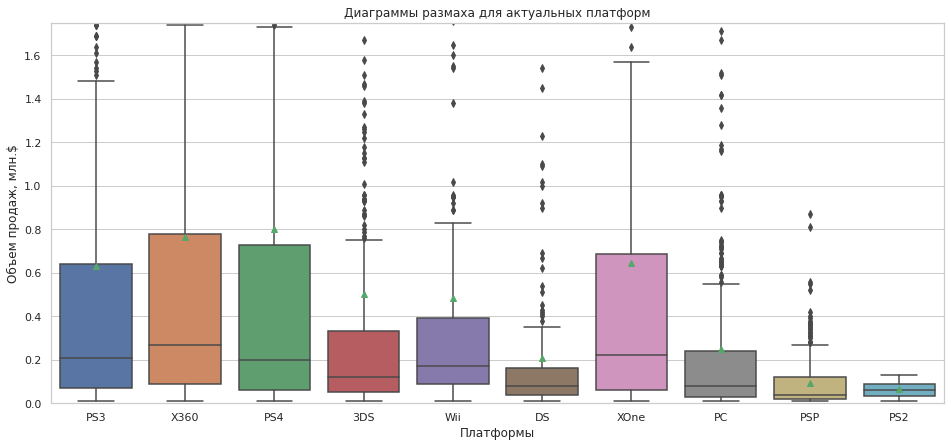

In [ ]:
boxplot(actual_games,
        x='platform',
        y='total_sales',
        plot_title='Диаграммы размаха для актуальных платформ',
        x_title='Платформы',
        y_title='Объем продаж, млн.$',
        ylim = (0,1.75))

Разница в абсолютных объемах продаж по платформам ярко выражена. Выделяются четыре лидера -- **X360**, **PS3**, **PS4**, **XOne**. Их средние значения также близки друг к другу. Лидерство данных платформ говорит об их актуальности (прибыльности) в выбранный промежуток времени для анализа.
  
были выделены 3 наиболее перспективные платформы. С учётом текущих выводов рассмотрим, как влияют на продажи отзывы пользователей и критиков внутри платформы **PS4** .

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Рассмотрим PS4.

-0.031957110204556424

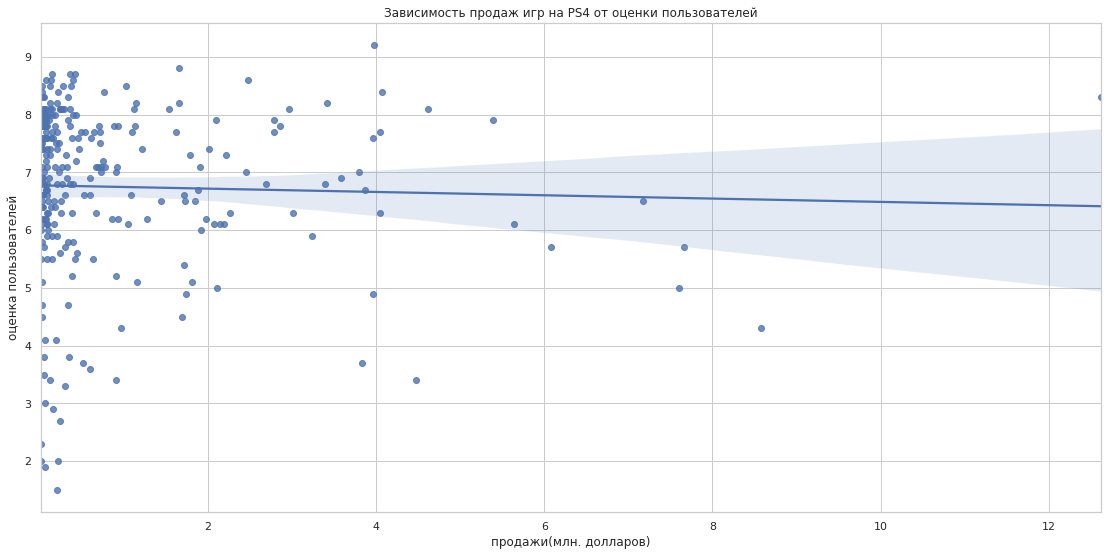

In [ ]:
fig, ax = plt.subplots(figsize=(19,9))
sns.regplot(x='total_sales', y='user_score', data=data[data['platform']=='PS4'], ax=ax)
plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка пользователей')
ax.set_title('Зависимость продаж игр на PS4 от оценки пользователей')
data[data['platform']=='PS4']['total_sales'].corr(data[data['platform']=='PS4']['user_score'])

0.406567902061781

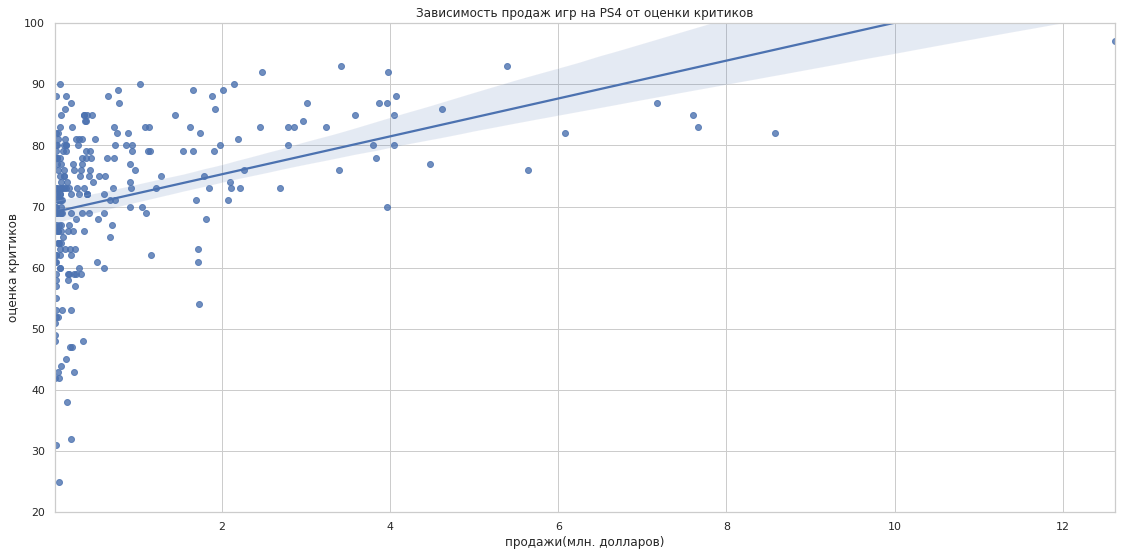

In [ ]:
fig, ax = plt.subplots(figsize=(19,9))
sns.regplot(x='total_sales', y='critic_score', data=data[data['platform']=='PS4'], ax=ax)
plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка критиков')
plt.ylim(20,100)
ax.set_title('Зависимость продаж игр на PS4 от оценки критиков')
data[data['platform']=='PS4']['total_sales'].corr(data[data['platform']=='PS4']['critic_score'])

In [ ]:
from IPython.core.display import HTML

def top5_pie_charts(index):
    '''
    Функция отрисовки круговых диаграм Топ-5 платфор по продажам
    '''
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    titles = ['Северная Америка', 'Европа' , 'Япония']
    subplot = 0
    
    for reg in regions:
        df = (data.pivot_table(index=index, values=reg, aggfunc='sum')
                          .sort_values(by=reg, ascending = False)
                          .head(5))

        labels = df.index.tolist()
        sizes = df[reg].tolist()

        axs[subplot].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        axs[subplot].axis('equal')
        axs[subplot].set_title(titles[subplot])
        
        subplot += 1
        
        display(HTML(df.T.to_html()))

### 2.3.2 Составление портрета пользователя каждого региона

platform,X360,PS2,Wii,PS3,DS
na_sales,595.74,572.92,486.87,390.13,380.31


platform,PS2,PS3,X360,Wii,PS
eu_sales,332.63,327.21,268.32,258.32,212.39


platform,DS,PS,PS2,SNES,3DS
jp_sales,175.02,139.78,137.54,116.55,100.62


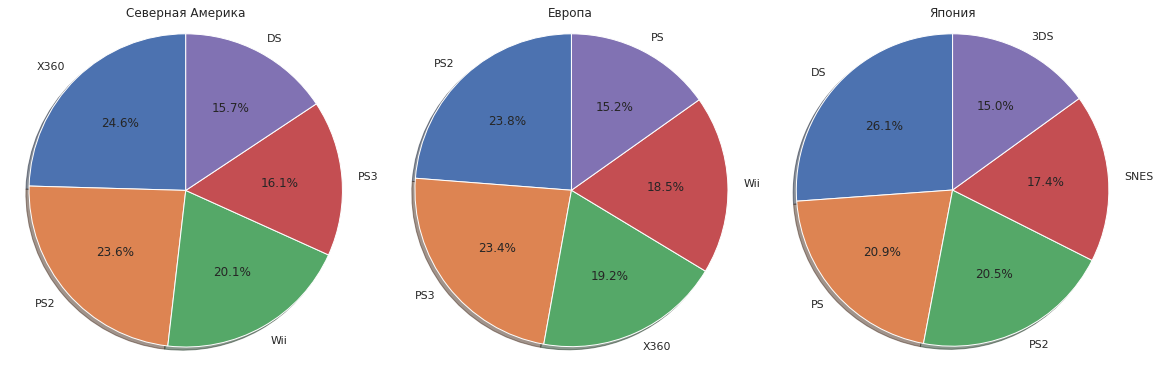

In [ ]:
top5_pie_charts('platform')

В Северной Америке и Европе лидируют одни и те же платформы. Порядок Топ-5 не идентичен, но, в целом, рейтинг похож. Рынок Северной Америки более прибыльный в сравнении с Европейским.

Японский рынок компьютерных игр стоит особняком от североамериканского и европейского -- их пятый номер на рынке Японии в лидерах, в Топ-5 входят платформы, которых нет ни в Северной Америке, ни в Европе. Прибыльность японского рынка в разы меньше европейского.

Японские геймеры предпочитают отечественного производителя. Вероятнее всего это специфика менталитета -- всё на благо страны и императора. Низкая прибыльность, вероятно, говорит о том, что времени для игр у японцев не так много -- опять же фанатичное трудолюбие на благо страны и императора. Это уже объект социального исследования, предоставленных данных для этого не достаточно.

genre,Action,Sports,Shooter,Platform,Misc
na_sales,863.17,671.2,584.83,444.44,399.57


genre,Action,Sports,Shooter,Racing,Misc
eu_sales,510.99,371.33,314.52,234.49,210.6


genre,Role-Playing,Action,Sports,Platform,Misc
jp_sales,353.39,160.14,134.93,130.71,107.02


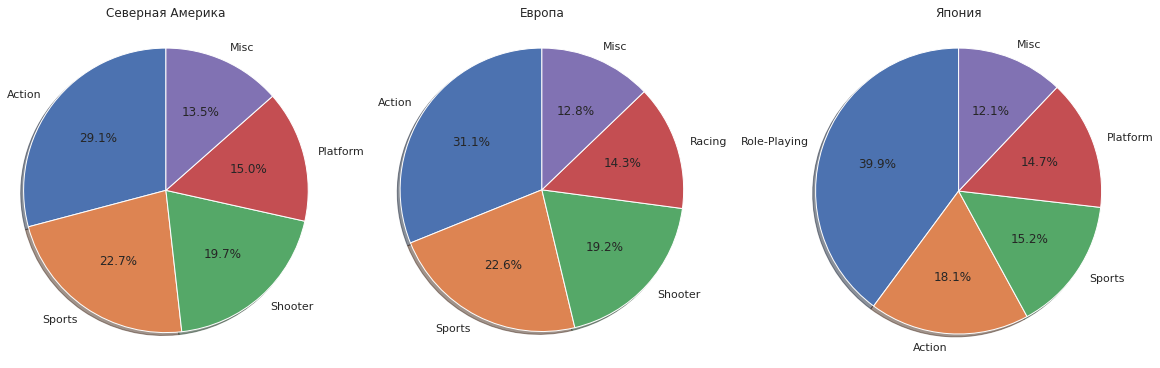

In [ ]:
top5_pie_charts('genre')

Рейтинг жанров в Северной Америке и Европе практически идентичны. Лидерами являются "моторные" жанры -- Action, Sports, Shooter.

Японский рынок здесь стоит меньшим особняком -- хотя в лидерах ролевые игры (которые для западного рынка в аутсайдерах), однако в Топ-5 входит Action. Возможно японцы устают постоянно быть маленькой шестерёнкой большого и слаженного механизма и проецируют желания ощутить себя королём, непопедимым воином или могущественным злобным орком через ролевые игры. В общем, требуются дополнительные исследования, не укладывающиеся в рамки переданных данных